In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./train.csv")
df.head()

,Date,T,RH,Gas,Value,Unnamed: 5,Unnamed: 6
0,15/3/2016,12.020833,54.883334,CO,1053.200000,NaN,NaN
1,16/3/2016,9.833333,64.069791,CO,995.250000,NaN,NaN
2,17/3/2016,11.292708,51.107292,CO,1025.250000,NaN,NaN
3,18/3/2016,12.866319,51.530903,CO,1064.444444,NaN,NaN
4,19/3/2016,16.016667,48.843750,CO,1088.741667,NaN,NaN


In [7]:
df.describe()

,T,RH,Value,Unnamed: 5,Unnamed: 6
count,1312.000000,1312.000000,1312.000000,0.0,0.0
mean,11.634917,39.873729,750.218839,NaN,NaN
std,37.041779,43.217836,225.520132,NaN,NaN
min,-200.000000,-200.000000,-160.000000,NaN,NaN
25%,12.387760,36.348177,648.370833,NaN,NaN
50%,18.832292,46.078993,769.370833,NaN,NaN
75%,25.557118,57.932292,880.570833,NaN,NaN
max,32.997917,81.104167,1436.233333,NaN,NaN


In [9]:
df.isna().sum()

Date             0
T                0
RH               0
Gas              0
Value            0
Unnamed: 5    1312
Unnamed: 6    1312
dtype: int64

<AxesSubplot:xlabel='Gas', ylabel='count'>

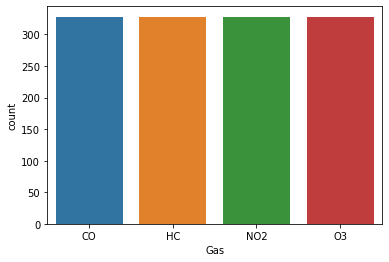

In [16]:
sns.countplot(x=df.Gas)

In [41]:
df.loc[df.Gas=='CO'].RH

,Date,T,RH,Gas,Value,Unnamed: 5,Unnamed: 6
0,15/3/2016,12.020833,54.883334,CO,1053.200000,NaN,NaN
1,16/3/2016,9.833333,64.069791,CO,995.250000,NaN,NaN
2,17/3/2016,11.292708,51.107292,CO,1025.250000,NaN,NaN
3,18/3/2016,12.866319,51.530903,CO,1064.444444,NaN,NaN
4,19/3/2016,16.016667,48.843750,CO,1088.741667,NaN,NaN
...,...,...,...,...,...,...,...
323,1/2/2017,5.267708,39.614930,CO,729.422222,NaN,NaN
324,2/2/2017,-55.515972,-24.010417,CO,474.291667,NaN,NaN
325,3/2/2017,-14.272917,28.563542,CO,615.700000,NaN,NaN
326,4/2/2017,4.848611,37.832986,CO,691.713889,NaN,NaN


<AxesSubplot:xlabel='Date', ylabel='RH'>

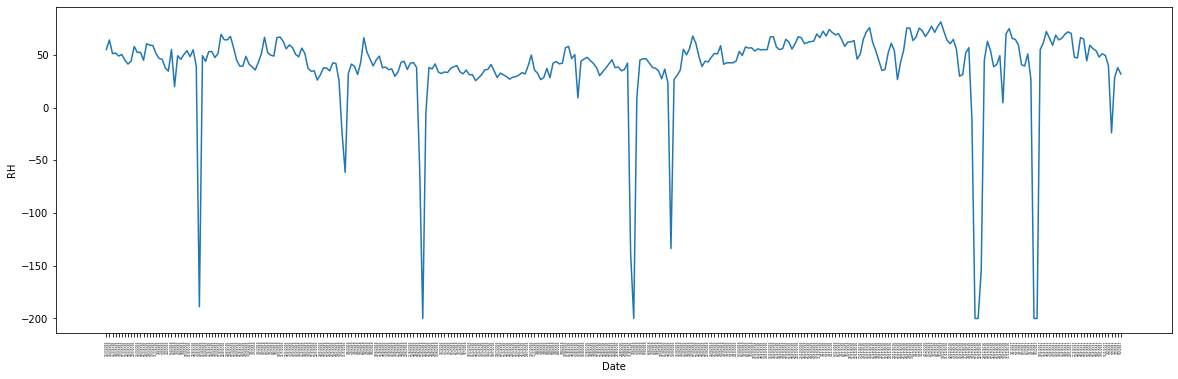

In [45]:
plt.figure(figsize=(20,6))
plt.xticks(fontsize=3, rotation=90)
sns.lineplot(y=df.loc[df.Gas=='CO'].RH, x=df.loc[df.Gas=='CO'].Date)

In [ ]:
plt.figure(figsize=(8,6))

In [16]:
(3*4.0 + 3*3.5 + 5*4.0 + 5*3.5 + 3*4.0) / 19

3.789473684210526

In [17]:
3*4.0 + 3*3.5 + 5*4.0 + 5*3.5 + 3*4.0

72.0

In [21]:
(83.49+64.89+76)/(23+21+19)

3.5615873015873016